# DATA SCRAPING REPORT - TEAM B

## FACEBOOK SCRAPING

### 1. METHOD

In [2]:
```
#IMPORT
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin
from collections import namedtuple
```

##### **Stage 1**: Utilize webdriver from selenium package to access to the target page and keep scrolling down until reaching the bottom. 

In [ ]:
```
#SCROLL DOWN FOR SOME WEB
SCROLL_PAUSE_TIME = 0.5
driver = webdriver.Chrome(r'C:\Users\nganh\Downloads\Application_FileSetup\chromedriver.exe')

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
driver.get('https://www.SamplePage.com')

start = time.time()

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
```

##### Stage 2: Use beautifulsoup to wrap the full source code then locate the pieces of code that store the information of each post. 

In [ ]:
```
soup = bs(driver.page_source, 'lxml')
tech_divs = soup.find_all('div', attrs={'class':'_4-u2 mbm _4mrt _5jmm _5pat _5v3q _7cqq _4-u8'}) 
```

##### Stage 3: Initialize a named tuple to store the information of each post and create a function that extracts needed data from the source code.

In [ ]:
```
TechBasic = namedtuple('TechBasic', 'FID, content, date, user')

def data_extraction(post):
    post_content = ''
    if len(post.find('span', attrs = {'class':'fcg'}).select('span')) == 3:
        post_content = 'Shared post/link'
    elif post.find('span', attrs = {'class':'_4a6n'}) != None:
        post_content = post.find('span', attrs={'class':'_4a6n'}).text
    elif len(post.select('p')) != 0:   
        for content in post.select('p'):
            post_content += content.text
    else:
        post_content = 'Others'
    return TechBasic(post.select('a')[0]['href'][-16:-1], content = post_content, date = post.select('abbr')[0]['title'], user = post.select('img')[0]['aria-label'])
    
```

##### Stage 4: Use a list of named tuple that stores extracted data of all posts and then create a responsive dictionary. Finally create a dataframe to store the data and output to a csv file to complete the process.

In [ ]:
```
results = [data_extraction(post) for post in tech_divs ]

data_dict = {'FID': [results[i].FID for i in range(len(tech_divs))], 'user': [results[i].user for i in range(len(tech_divs))], 'content': [results[i].content for i in range(len(tech_divs))], 'date': [results[i].date for i in range(len(tech_divs))]}

data = pd.DataFrame(data_dict)

data.to_csv('filename.csv')

end = time.time()
```

### 2. SUMMARY

In [12]:
```
from IPython.display import Image
from IPython.core.display import HTML
```

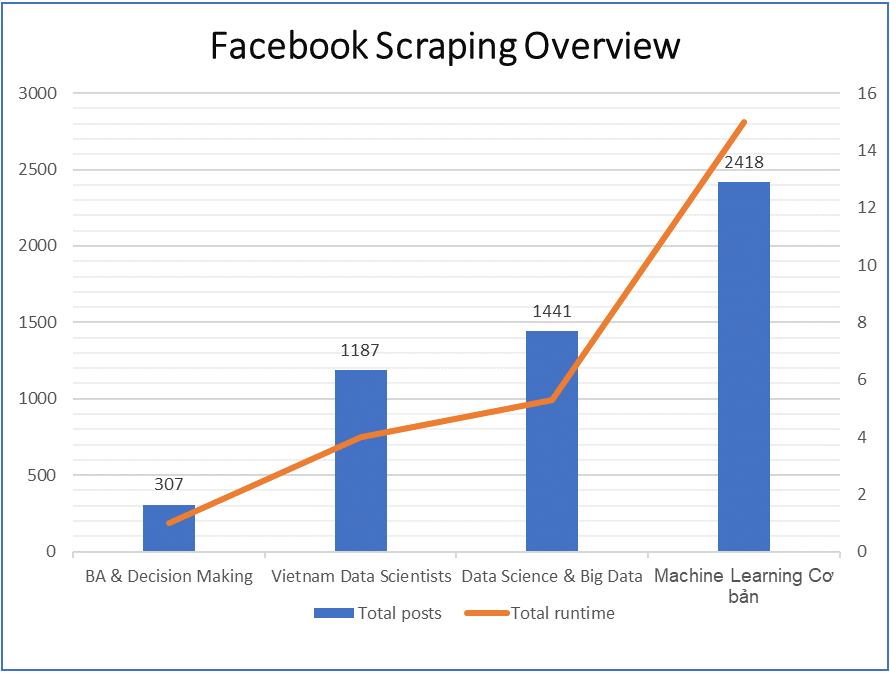

In [3]:
Image('https://i.imgur.com/hZaNdvu.png')

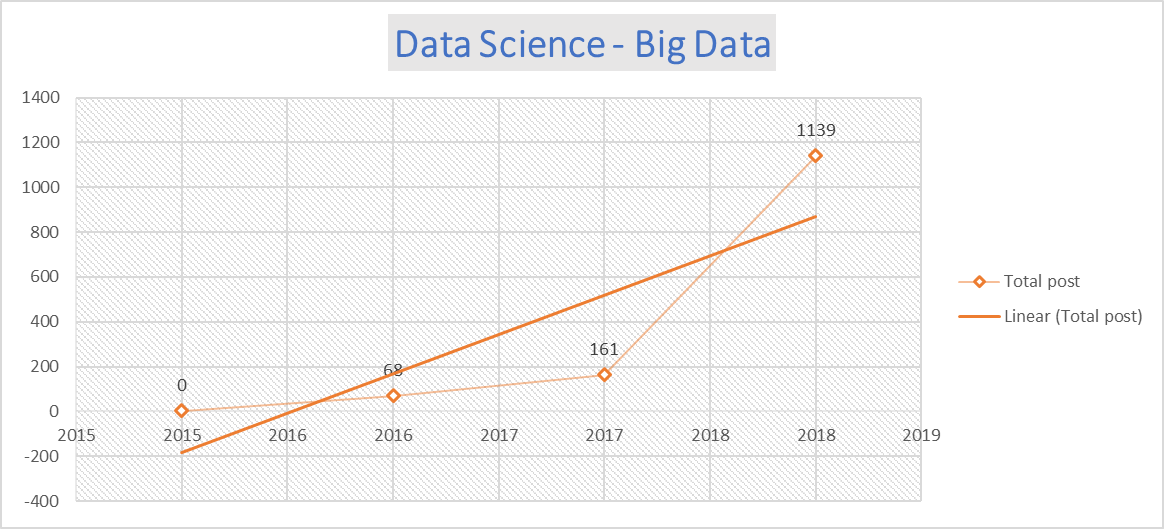

In [6]:
Image("https://i.imgur.com/CD8aVVO.png")

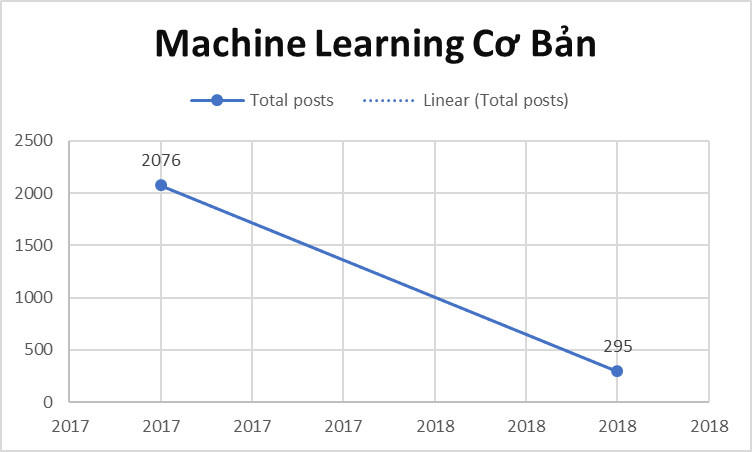

In [7]:
Image("https://i.imgur.com/7HDeam3.png")

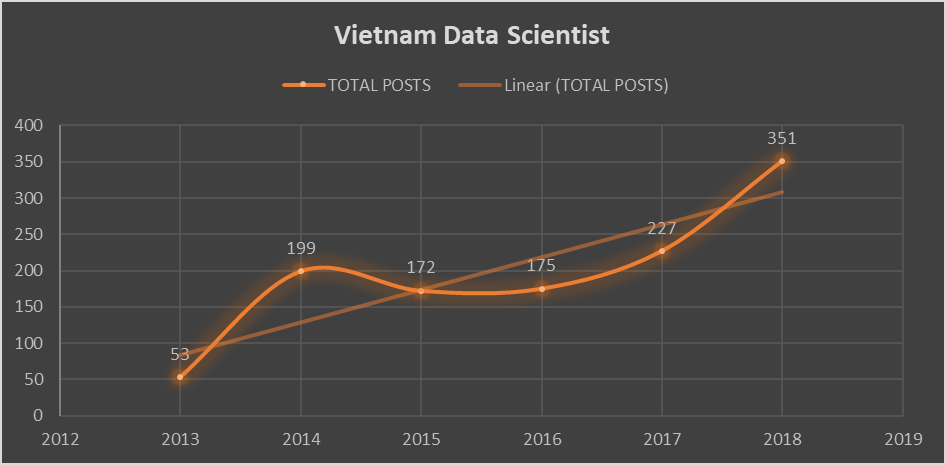

In [8]:
Image("https://i.imgur.com/IIt3WoQ.png")

### 3. TAKEAWAYS

<ul>
    <li> The number of posts started growing up in 2017 and keep increasing till 2018. This observation helps predict the future of job oportunities related to Data Science and other fields that emcompass data analyzing skills. 
    <li> As the source code of a Facebook page keeps growing when we scroll down to the bottom, it is convenient to wrap the full source code at a time without considering missing any pieces of source code. This approach suggests a new way to collect data from Facebook pages instead of inspecting the code and processing the data at the same time. We now can save a considerable amount of time by making a small change in our method. </li>
    <li> Some of the posts are share posts so we need to capture the link and take note for latter review. </li>

## WEB SCRAPING

### 1. COMMON STRUCTURES

<ol>
    **<li>** **Vietnamworks, Jobstreet, ITviec** </li>
        <ul>
            <li>Scroll down to the botton of the page and wrap all the source code.</li>
            <li>Find the interactive element that allows to move to the next page if applicable. Use webdriver method (*element.click()*) to make it work.</li>
            <li>While moving between pages, we can extract the url of each post or wait until it reaches the last pages. </li>
            <li>Ultilize **futuresessions** to minimize the total time of accessing posts. 
            <li>Use **beautifulsoup** to modify the code and extract the data.
            <li>Create a dataframe to store the results.</li>
    </ul>
    <li> **Internship.com.vn**</li>
        <ul>
            <li>Find the "see more" button and continue to take the see more action until we have covered the entire number of posts.</li>
            <li>Wrap the full source code.</li>
            <li>Extract urls from the source code.</li>
            <li>Do the rest steps as the same as what we already did to the above websites.</li>
    </ul>
        <li> **Glassdoor** </li>
    <li> **Linkedin** </li>
          

### 2. OVERVIEW

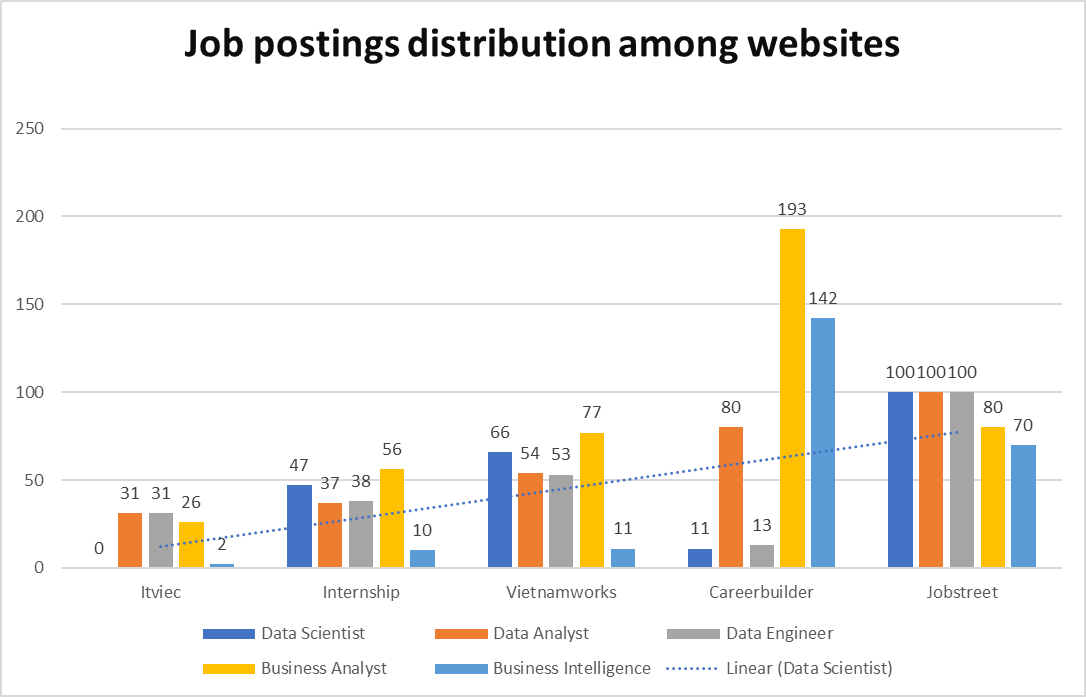

In [9]:
Image("https://i.imgur.com/gtGZD64.png")

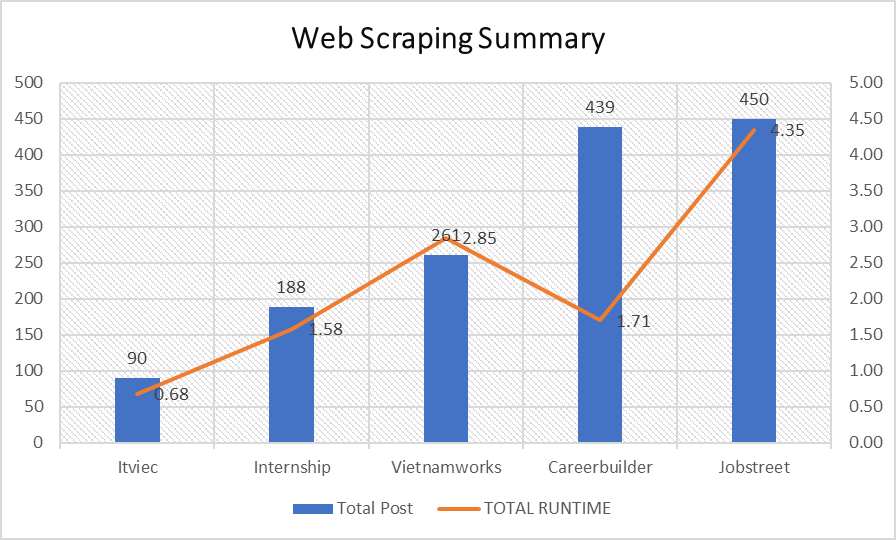

In [13]:
Image("https://i.imgur.com/tyP7RCe.png")

In [ ]:
'''
Giải thích vì sao trang careerbuilder cào nhanh là vì:
do trang careerebuilder request response rất nhanh + không phải chờ kiểm tra có pop-up hay không,
nên có sự chênh lệch lớn, bên cạnh đó trang có số lượng post tương đương là Jobstreet lại ngược lại,
thêm vào đó là mỗi trang của jobstreet chỉ hiện 10 results mỗi trang nên pahỉ chờ rất lâu, 
rồi cả lúc dùng future session nó hay bị đứng, em cũng k biết tại sao, nó cứ chạy hoài, 
k dưng cũng k cho ra kq, vì future session chạy ngầm nên e cũng chưa find out đc lí do
'''
